In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np
import pandas as pd


# PCA
1. Principal Component Analysis (PCA) is by far the most popular dimensionality reduc‐
tion algorithm. First it identifies the hyperplane that lies closest to the data, and then
it projects the data onto it
2. It seems reasonable to select the axis that preserves the maximum amount of var‐
iance, as it will most likely lose less information than the other projections. 
3. Another
way to justify this choice is that it is the axis that minimizes the mean squared dis‐
tance between the original dataset and its projection onto that axis. This is the rather
simple idea behind PCA.
4

# Principal Components
1. PCA identifies the axis that accounts for the largest amount of variance in the train‐
ing set.
2. for higher-dimensional data‐
set, PCA would also find a second axis orthogonal to  previous axes similarly third axis, orthogonal to both previous axes, and a fourth,
a fifth, and so on—as many axes as the number of dimensions in the dataset.
1. The unit vector that defines the ith axis is called the ith principal component (PC).
2. So how can you find the principal components of a training set? 
3. Luckily, there is a
standard matrix factorization technique called Singular Value Decomposition (SVD)
that can decompose the training set matrix X into the matrix multiplication of three
matrices U Σ VT
, where V contains all the principal components 

In [ ]:
#Let's build a simple 3D dataset:

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [8]:
df = pd.DataFrame(X)
df.head()

,0,1,2
0,-1.015700,-0.550913,-0.261326
1,-0.007717,0.599586,0.035078
2,-0.953171,-0.464537,-0.249203
3,-0.920123,0.210096,0.021824
4,-0.763097,0.158261,0.191525


#principle component
1. PCA assumes that the dataset is centered around the origin. 
2. As we
will see, Scikit-Learn’s PCA classes take care of centering the data
for you. 
3. However, if you implement PCA yourself (as in the pre‐
ceding example), or if you use other libraries, don’t forget to center
the data first.

In [63]:
X_centred = X - X.mean(axis =0) #PCA assumes that the dataset is centered around the origin.
U,s,VT = np.linalg.svd(X_centred)
VT  #
V = VT.T
V   #principle component matrix

array([[ 0.93636116, -0.34027485, -0.08626012],
       [ 0.29854881,  0.90119108, -0.31420255],
       [ 0.18465208,  0.2684542 ,  0.94542898]])

In [68]:
#, then extracts the first two PCs:
c1 = V[:, 0]
c2 = V[:, 1]
print(c1,c2)


[0.93636116 0.29854881 0.18465208] [-0.34027485  0.90119108  0.2684542 ]


# dimisnsonality reduction by projecton on principe comp
1. Once you have identified all the principal components, you can reduce the dimen‐
sionality of the dataset down to d dimensions by projecting it onto the hyperplane
defined by the first d principal components d=2 in above examplke
2. Selecting this hyperplane ensures that the
projection will preserve as much variance as possible.


3. To project the training set onto the hyperplane, you can simply compute the matrix
multiplication of 
4. the training set matrix X by the matrix Wd
, defined as the matrix
containing the first d principal components (i.e., the matrix composed of the first d
columns of V),

Projecting the training set down to d dimensions
Xd‐proj = XWd

In [76]:
w2 = V[:,:2]
print(w2)
X2_proj = X_centred.dot(w2)  #projection of data on first 2 princ com 
print(X2_proj.shape)
pd.DataFrame(X2_proj).head()  #projection of data on first 2 princ com  

[[ 0.93636116 -0.34027485]
 [ 0.29854881  0.90119108]
 [ 0.18465208  0.2684542 ]]
(60, 2)


,0,1
0,-1.262033,-0.420676
1,0.080015,0.352722
2,-1.175458,-0.360857
3,-0.893056,0.308629
4,-0.730163,0.254040


Using Scikit-Learn

The following code applies PCA to reduce the dimensionality of the dataset
down to two dimensions (note that it automatically takes care of centering the data)

In [81]:
from sklearn.decomposition import PCA
pca = PCA( n_components=2)
X2_projS = pca.fit_transform(X)  #projection of data on first 2 princ com 
pd.DataFrame(X2_projS).head() 

,0,1
0,1.262033,0.420676
1,-0.080015,-0.352722
2,1.175458,0.360857
3,0.893056,-0.308629
4,0.730163,-0.254040


In [83]:
np.allclose(X2_proj, -X2_projS)

True

After fitting the PCA transformer to the dataset, you can access the principal compo‐
nents using the components_ variable (note that it contains the PCs as horizontal vectors, so, for example, the first principal component is equal to pca.components_.T[:,
0]).


In [88]:
#principle components
print(pca.components_)
pca.components_.T[:, 0]

[[-0.93636116 -0.29854881 -0.18465208]
 [ 0.34027485 -0.90119108 -0.2684542 ]]


array([-0.93636116, -0.29854881, -0.18465208])

#### Explained Variance Ratio of principle components
2. It indicates
the proportion of the dataset’s variance that lies along the axis of each principal com‐
ponent.

In [90]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

This tells you that 84.2% of the dataset’s variance lies along the first axis, and 14.6%
lies along the second axis. This leaves less than 1.2% for the third axis, so it is reason‐
able to assume that it probably carries little information

In [ ]:
#can also recover original features from reduced dimension see the book code

PCA inverse transformation, back to the original number of
dimensions
Xrecovered = Xd‐proj *WdT

# Choosing the Right Number of Dimensions

1. generally preferable to choose the number of dimensions that add up to a sufficiently
large portion of the variance (e.g., 95%). 
2. Unless, of course, you are reducing dimen‐
sionality for data visualization—in that case you will generally want to reduce the
dimensionality down to 2 or 3.

In [91]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [92]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [95]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

In [100]:
print(X_train.shape)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)  #no of component shows 95% of varianse of data set

(52500, 784)
154


In [98]:
s = np.array([1,2,3,2])
np.cumsum(s)

array([1, 3, 6, 8], dtype=int32)

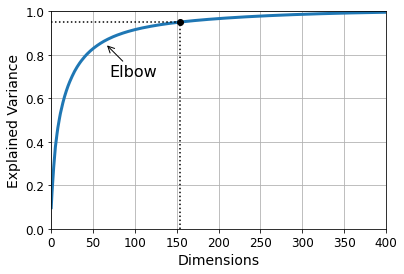

In [110]:

plt.plot(cumsum, linewidth=3)




plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)





plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

1. another option is to plot the explained variance as a function of the number of
dimensions. 
2. There will usually be an elbow in the
curve, where the explained variance stops growing fast. 
3. You can think of this as the
intrinsic dimensionality of the dataset.

In [107]:
#now alternatively to find  no of component shows 95% of varianse of data set
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [113]:
print("original features", X_train.shape[1])
print('reduced feature to ',pca.n_components_)
np.sum(pca.explained_variance_ratio_)

original features 784
reduced feature to  154


0.9503684424557425

1. You should find that each instance will have just over 150 features, instead of
the original 784 features. So while most of the variance is preserved, the dataset is
now less than 20% of its original size!
2. can speed up a classification algorithm (such as an SVM classifier)
tremendously

# recover data
1. It is also possible to decompress the reduced dataset back to 784 dimensions by
applying the inverse transformation of the PCA projection. 
2. Of course this won’t give
you back the original data, since the projection lost a bit of information (within the
5% variance that was dropped), 
3. but it will likely be quite close to the original data.
4. The mean squared distance between the original data and the reconstructed data
(compressed and then decompressed) is called the reconstruction error. 


In [114]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

Equation 8-3. PCA inverse transformation, back to the original number of
dimensions
Xrecovered = Xd‐proj * WdT

# Randomized PCA
1. If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a sto‐
chastic algorithm called Randomized PCA that quickly finds an approximation of the
first d principal components
2. it is dramatically faster
than full SVD when d is much smaller than n


3. By default, svd_solver is actually set to "auto": Scikit-Learn automatically uses the
randomized PCA algorithm if m or n is greater than 500 and d is less than 80% of m
or n, or else it uses the full SVD approach. If you want to force Scikit-Learn to use full
SVD, you can set the svd_solver hyperparameter to "full".

In [117]:
r_pca = PCA(svd_solver='randomized',n_components=154)
X_reduced = r_pca.fit(X_train)

In [119]:
print(r_pca.n_components_)

154


# Incremental PCA
1. One problem with the preceding implementations of PCA is that they require the
whole training set to fit in memory in order for the algorithm to run. 

2. Incremental PCA (IPCA) algorithms have been developed: you can split the training
set into mini-batches and feed an IPCA algorithm one mini-batch at a time
3. useful for large training sets, and also to apply PCA online

In [120]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
     inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)


# Kernel PCA
1. kernel trick, a mathematical technique that implicitly
maps instances into a very high-dimensional space (called the feature space),
2. It turns out that the same trick can be applied to PCA, making it possible to perform
complex nonlinear projections for dimensionality reduction. This is called KernelPCA

In [122]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [123]:
X


array([[-3.29677117,  4.26198454,  7.69787682],
       [ 5.95972743, 11.45784273, 12.72625276],
       [ 6.66051523, 18.15820401, -9.84713337],
       ...,
       [ 6.18364276,  1.44095323, -1.71242696],
       [ 5.86076169,  1.09185823, 12.47091112],
       [-8.16213703,  5.61235668,  4.51171684]])

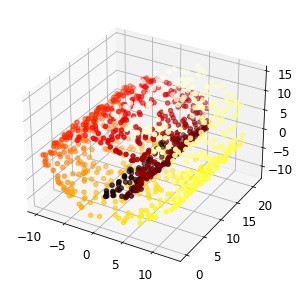

In [127]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)

In [128]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)


In [129]:
X_reduced

array([[-0.20318153, -0.04192012],
       [-0.12291985, -0.08891651],
       [ 0.06294914, -0.06770846],
       ...,
       [-0.01755176,  0.50273796],
       [-0.09990453,  0.00253754],
       [-0.19161337, -0.0417062 ]])

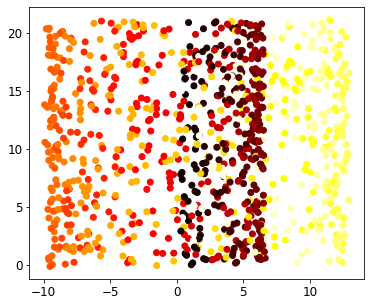

In [133]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.scatter(X[:, 0], X[:, 1],  c=t, cmap=plt.cm.hot)
plt.show()

# Selecting a Kernel and Tuning Hyperparameters
simply use grid search to select the kernel and hyper‐
parameters that lead to the best performance on that task

For example, the following
code creates a two-step pipeline, first reducing dimensionality to two dimensions
using kPCA, then applying Logistic Regression for classification. Then it uses Grid
SearchCV to find the best kernel and gamma value for kPCA in order to get the best
classification accuracy at the end of the pipeline

In [139]:
y = t > 6.9

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [146]:
grid_search.best_estimator_

Pipeline(steps=[('kpca',
                 KernelPCA(gamma=0.043333333333333335, kernel='rbf',
                           n_components=2)),
                ('log_reg', LogisticRegression())])

In [147]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

Another approach, this time entirely unsupervised, is to select the kernel and hyper‐
parameters that yield the lowest reconstruction error


Scikit-Learn will do this automatically if you set
fit_inverse_transform=True, as shown in the following code

In [148]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
 fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [149]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

32.78630879576614

# rough work

In [11]:
X.mean(axis=0)

array([0.02406745, 0.20932515, 0.07155422])

In [13]:
X.mean()

0.10164893903981279

In [44]:
t = np.array([[2,3,4],[4,5,6],[2,1,5]])
t

array([[2, 3, 4],
       [4, 5, 6],
       [2, 1, 5]])

In [45]:
t.mean(axis=0)

array([2.66666667, 3.        , 5.        ])

In [46]:
21/6

3.5

In [47]:
d = t- t.mean(axis=0)
d

array([[-0.66666667,  0.        , -1.        ],
       [ 1.33333333,  2.        ,  1.        ],
       [-0.66666667, -2.        ,  0.        ]])

In [39]:
d = t- t.mean(axis=0)
d

array([[-26.5, -12. ,   1.5],
       [ 26.5,  12. ,  -1.5]])

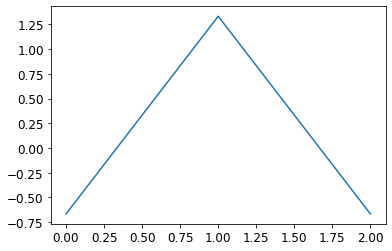

In [57]:
plt.plot(d[:,0])

In [55]:
d[:,1]

array([ 0.,  2., -2.])